## Learning outcomes: We will learn/review
### [1] LU Decompositions.
### [2] SVD Decompositions.
### [3] 2-dimensional flows.
### [4] Relevant examples such as damped SHO.
### [5] Exceptions that make the case of 2-D flows and of chaos, for example real oscillator.

In [1]:
from matplotlib import pyplot as plt # We need this package to plot figures.
import numpy as np
from scipy.linalg import expm # This is the "exponential of an operator" function
from scipy.integrate import odeint
# from scipy.linalg import eigh


## Today we will learn formally the point I have been making about stability of planetary orbits. 
## The important points around this part of Physics were first discovered around the study of the stability of planetary orbits, but we will study them in a simpler context, namely two dimensional flows.
## The area of physics is called Nonlinear dynamics and Chaos theory (I recommend the books by Strogatz and also by Pikovski and Balanov for advanced topics), but we will restrict ourselves to a small part of the analysis, namely the discussion of fixed points.


## Rewrite the harmonic oscillator equation $\ddot{x}+\omega_0^2 x +\gamma \dot{x}=0$ in terms of the two dimensional vector $\vec{v}=(x,p)^T$ (T means that v is a $2\times 1$ column vector), with the identification $\dot{x}=p/m$.

### What you have is a two-dimensional vector equation of the form $\dot{\vec{v}}=M\vec{v}$. Here $M$ is a matrix whose determinant we will denote by $\Delta$ and whose trace is $\tau$.

## Write the evolution in terms of the eigenvalues and eigenvectors of M, assuming it is diagonalisable. Discover that the qualitative nature of the evolution is determined by the eigenvalues, given by $\lambda_{\pm}=\frac{\tau\pm\sqrt{\tau^2-4\Delta}}{2}$.

### Finally, notice that for differential equation $\dot{\vec{v}}=M(\vec v)\vec{v}$ can be locally written as a linear equation. 

## The dynamics can be classified into the following diagram, taken from Strogatz (Chapter 5 linear analysis)

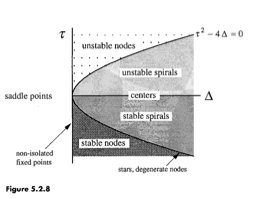

### The diagram above will be explained to you in class.

## [1] Solve for the flow of $\dot{x}=x,\dot{y}=x+y$ analytically and verify numerically.
## [2] Solve for the flow of $\dot{x}=-y,\dot{y}=-x$ analytically and verify numerically.
## [3] Solve the differential equation $\dot{x}=x-y,\dot{y}=x+y$ and verify numerically.
## [4] Solve $\ddot \theta=-\omega^2\sin(\theta)$ by linearizing the RHS and plot the phase trajectories to verify for different initial conditions.

In [2]:
from matplotlib import pyplot as plt 
import numpy as np
from scipy.linalg import expm 
from scipy.integrate import odeint

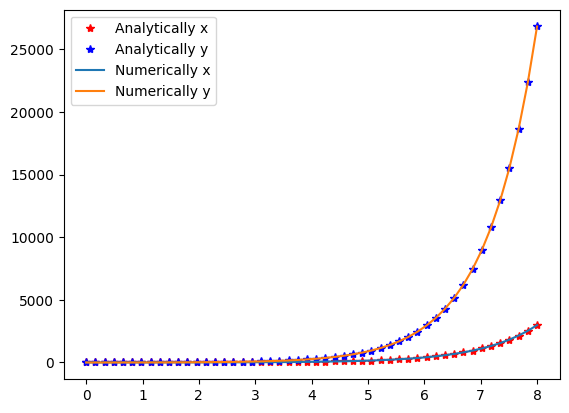

In [3]:
def Diff1(u,t): 
    x,y=u
    return x,x+y 

y0=[1,1]
t=np.linspace(0,8,50)

#analitically
c=(1+t)*np.exp(t)
v=np.exp(t)
plt.plot(t,v,"r*")
plt.plot(t,c,"b*")

#Numerically
v=odeint(Diff1,y0,t)
plt.plot(t,v)
plt.legend(["Analytically x","Analytically y","Numerically x","Numerically y"])

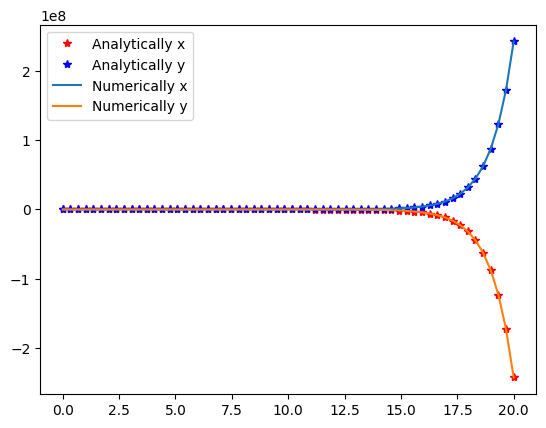

In [4]:
def Diff2(u,t): 
    x,y=u
    return -y, -x

y0=[1,0]
t=np.linspace(0,20,60)
#Analitically
c=0.5*np.exp(t) + 0.5*np.exp(-t)
v=-0.5*np.exp(t) + 0.5*np.exp(-t)
plt.plot(t,v,"r*")
plt.plot(t,c,"b*")

#Numerically
x=odeint(Diff2,y0,t)
plt.plot(t,x)

plt.legend(["Analytically x","Analytically y","Numerically x","Numerically y"])

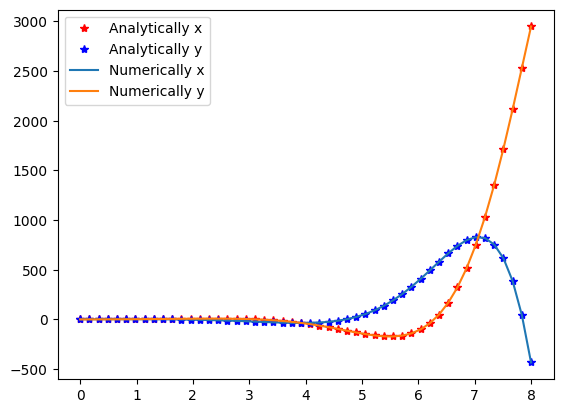

In [5]:
def Diff3(u,t): 
    x,y=u
    return x-y, x+y

y0=[1,0]
t=np.linspace(0,8,50)

#Analitically
c=np.cos(t)*np.exp(t)
v=np.sin(t)*np.exp(t)
plt.plot(t,v,"r*")
plt.plot(t,c,"b*")

#Numerically
v=odeint(Diff3,y0,t)
plt.plot(t,v)

plt.legend(["Analytically x","Analytically y","Numerically x","Numerically y"])

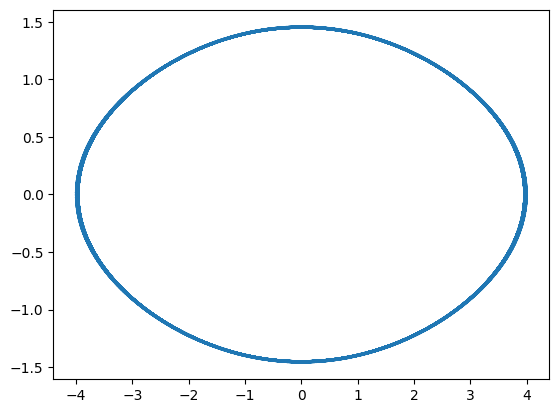

In [6]:
def Diff3(u,t,w=3): 
    theta_dot,theta=u
    return -w**2*np.sin(theta),theta_dot
y0=[4,0]
t=np.linspace(0,100,1000)
v=odeint(Diff3,y0,t)
plt.plot(v[:,0],v[:,1])


# LU Decomposition 

### see https://en.wikipedia.org/wiki/LU_decomposition
Any matrix $M$ can be written as a product of two matrices $M=LU$, such that $L$ is lower diagonal only and $U$ is upper diagonal.
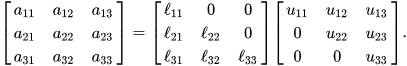

# Singular Value Decomposition 

### See https://en.wikipedia.org/wiki/Singular_value_decomposition


Any matrix $M$ can be written as $M=UDV^\dag$, where $U,V$ are unitary matrices and $D$ is diagonal and positive semidefinite.

## [5] Here is the logic of SVD. Start with a matrix M which can be rectangular, write $M^\dagger M =M_R$ and diagonalise $M_R$ using standard diagonlisation techniques (you can use npscipy.diagonalize() method which returns a tuple $[R,D^2]$ where $M_R=RD^2R^\dagger$) and likewise diagonalise $ M M^\dagger=M_L$ which is diagonalized by $[L,D^2]$. Identify that $M=LDR^\dagger$ and use it to produce an SVD of a generic complex rectangular matrix M.

### LU is a bit complex, let us not do it in class...

In [7]:
# from scipy.linalg import eigh
def svd(M):
    M_Dag=M.conj().T 
    M_R=np.dot(M_Dag,M)
    D21,R=eigh(M_R)                      
    D=np.sqrt(D21)

    M_L=np.dot(M,M_Dag)
    D22,L=eigh(M_L)
    return L,R.conj().T,D

M=np.array([[4,1],[1,3]])
print(svd(M))
print(np.linalg.svd(M))

NameError: name 'eigh' is not defined